In [81]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox# for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
import numpy as np

In [82]:
df = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/quartiers_sociologiques_2014.geojson') # arrondisement data 
city = 'Montreal, Canada'

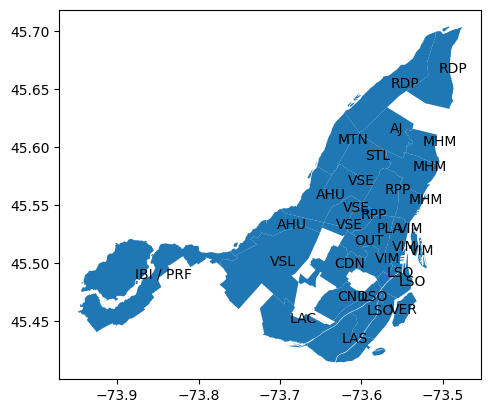

In [83]:
ax = df.plot()
for idx, row in df.iterrows():
    ax.annotate(text=row['Abreviation'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black')
plt.show()

In [84]:
df

,id,Q_sociologique,Arrondissement,Abreviation,nbr_RUI,Table,geometry
0,1,Ahuntsic,Ahuntsic-Cartierville,AHU,0,Solidarité Ahuntsic,"MULTIPOLYGON (((-73.69831 45.54688, -73.69813 ..."
1,2,Bordeaux-Cartierville,Ahuntsic-Cartierville,AHU,1,Conseil local des intervenants communautaires ...,"MULTIPOLYGON (((-73.69831 45.54688, -73.69827 ..."
2,3,Anjou,Anjou,AJ,0,Regroupement des organismes communautaires et ...,"MULTIPOLYGON (((-73.60235 45.61259, -73.60142 ..."
3,4,Côte-des-Neiges,Côte-des-Neiges–Notre-Dame-de-Grâce,CDN,0,Corporation de développement communautaire de ...,"MULTIPOLYGON (((-73.67721 45.48369, -73.67628 ..."
4,5,Notre-Dame-de-Grâce,Côte-des-Neiges–Notre-Dame-de-Grâce,CND,0,Conseil communautaire de Notre-Dame-de-Grâce,"MULTIPOLYGON (((-73.62992 45.47836, -73.62950 ..."
5,6,Nord-Ouest de l’Ile de Montréal,L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Ro...,IBI / PRF,0,Table de quartier du Nord-Ouest de l’Ile de Mo...,"MULTIPOLYGON (((-73.75168 45.50442, -73.75251 ..."
6,7,Lachine,Lachine,LAC,1,Concert’Action Lachine,"MULTIPOLYGON (((-73.62931 45.44848, -73.62940 ..."
7,8,LaSalle,LaSalle,LAS,1,Table de développement social de LaSalle,"MULTIPOLYGON (((-73.59929 45.43747, -73.59934 ..."
8,9,Hochelaga-Maisonneuve,Mercier–Hochelaga-Maisonneuve,MHM,1,La Table de quartier Hochelaga-Maisonneuve,"MULTIPOLYGON (((-73.55270 45.56795, -73.55263 ..."
9,10,Mercier-Est,Mercier–Hochelaga-Maisonneuve,MHM,1,Solidarité Mercier-Est,"MULTIPOLYGON (((-73.50739 45.61074, -73.50739 ..."


In [85]:
df['centroid'] = df['geometry'].centroid

# Create a new DataFrame with necessary columns
neighbourhood_centroids = df[['Q_sociologique', 'Arrondissement', 'Abreviation','geometry', 'centroid']].copy()

# Drop duplicate rows to ensure unique arrondissements
neighbourhood_centroids = neighbourhood_centroids.drop_duplicates(subset=['Arrondissement'])

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_47381/3336319504.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['centroid'] = df['geometry'].centroid


In [86]:
neighbourhood_centroids.to_csv('neighbourhood_centroids', index=False)

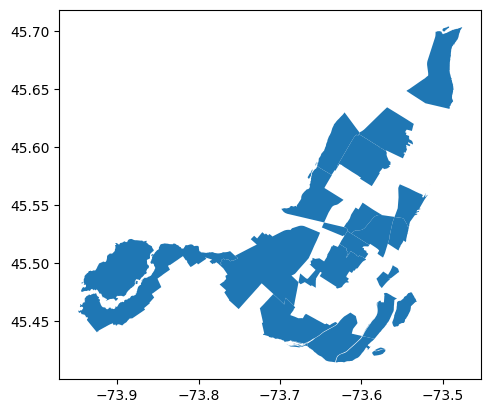

In [88]:
neighbourhood_centroids.plot();

In [17]:
pois = ox.geometries_from_place(
    city, tags={"amenity": True}
)

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_47381/3808332410.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  pois = ox.geometries_from_place(


In [18]:
# code retrieved from emma's pois_cleaning.ipynb

# remove any poi amenity types where there are less than 10 of that type
clean_pois = pois.groupby('amenity').filter(lambda x: len(x) >= 10)
# Initialize an empty list to hold the values for the new column
amenity_cat = []

# Iterate over each value in the 'amenity' column
for x in clean_pois['amenity']:
    # Check conditions and assign corresponding category to amenity_cat list
    if x == 'restaurant' or x == 'cafe' or x == 'fast_food':
        amenity_cat.append('eatery') # edit name of category
    else:
        amenity_cat.append('other') # leave as blank rather than other

# Assign the populated list to the new column 'amenity_cat'
clean_pois['amenity_cat'] = amenity_cat

In [15]:
clean_pois.to_csv('clean_pois', index=True)

In [19]:
clean_pois_nodes = clean_pois.loc['node'] # retreiving only POINTS and not POLYGONS

In [24]:
pharmacies = clean_pois_nodes[clean_pois_nodes['amenity'] == 'pharmacy']
pharmacies = ox.project_gdf(pharmacies)

In [26]:
bars = clean_pois_nodes[clean_pois_nodes['amenity'] == 'bar']
bars = ox.project_gdf(pharmacies)
cafes = clean_pois_nodes[clean_pois_nodes['amenity'] == 'cafe']
cafes = ox.project_gdf(cafes)
restaurants = clean_pois_nodes[clean_pois_nodes['amenity'] == 'restaurant']
restaurants = ox.project_gdf(restaurants)

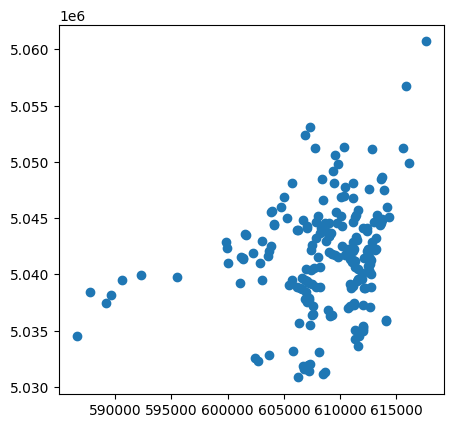

In [27]:
pharmacies.plot();

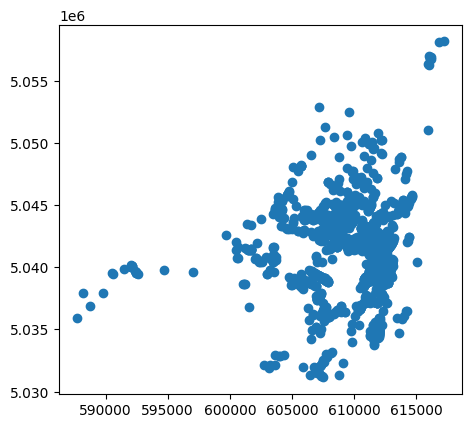

In [28]:
restaurants.plot();

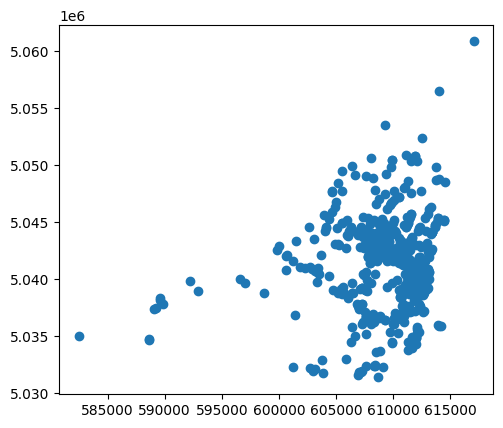

In [29]:
cafes.plot();

In [36]:
import numpy as np

def extract_coordinates(gdf):
    coords = np.vstack((
        np.array(gdf.geometry.x),
        np.array(gdf.geometry.y))).T
    return coords

In [38]:
pharmacies_coords = extract_coordinates(pharmacies)
restaurants_coords = extract_coordinates(restaurants)
cafes_coords = extract_coordinates(cafes)

In [40]:
drive_graph = ox.graph_from_place(city, network_type='drive')
G_proj = ox.project_graph(drive_graph)
# get the street network for a place, and its area in square meters - TODO: try to get per neighbourhood
city = ox.geocode_to_gdf('Montreal, Canada')
city_proj = ox.project_gdf(city)
area = city_proj.unary_union.area

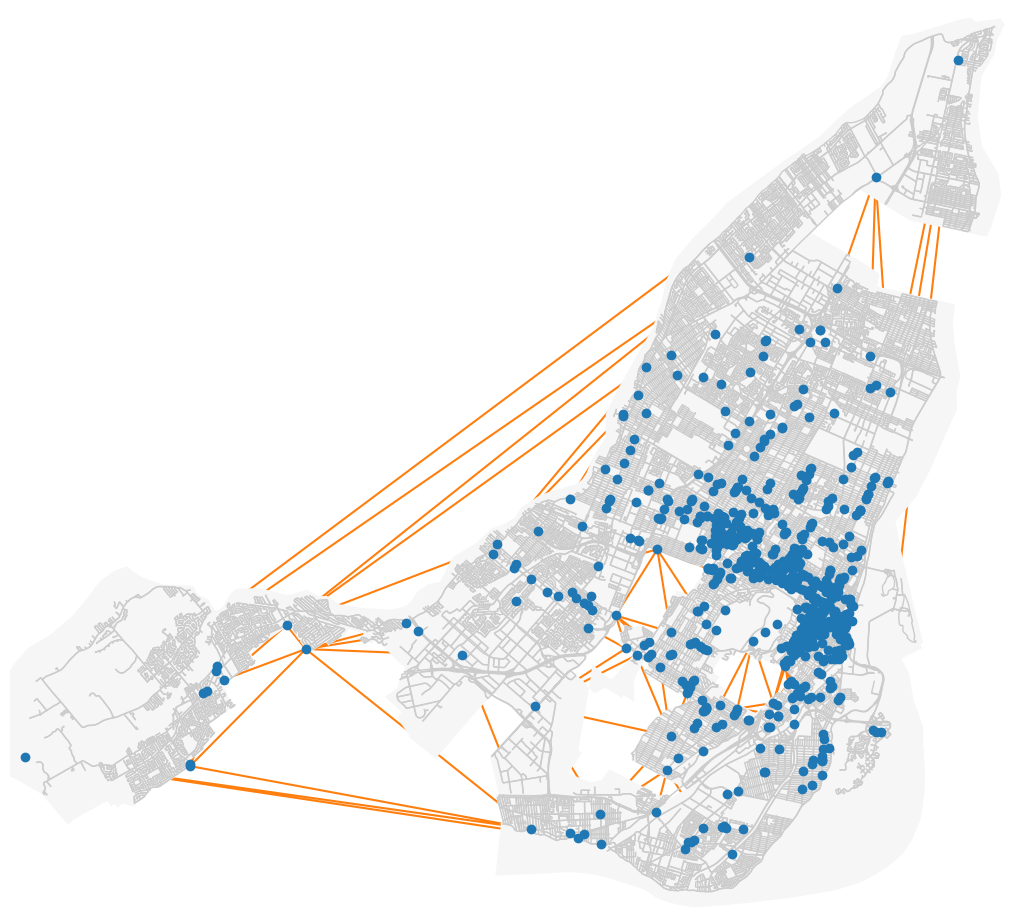

In [47]:
tri = Delaunay(cafes_coords)
fig = plt.figure(figsize=(12, 9))
axes = fig.add_axes([0, 0, 1, 1])
delaunay_plot_2d(tri, ax=axes);

# Plot city border - try to plot neighbourhoods
city_proj.plot(fc="#F6F6F6", ec="none", ax=axes);
ox.plot_graph(G_proj, node_size=0, bgcolor="w", ax=axes, edge_color="#CCCCCC");

In [59]:
G_proj.crs

AttributeError: 'MultiDiGraph' object has no attribute 'crs'

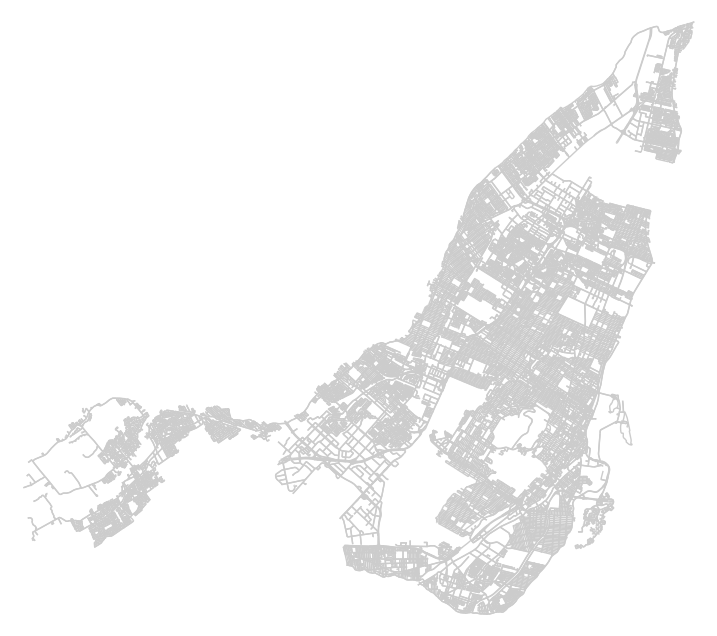

<Figure size 640x480 with 0 Axes>

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the drive network
ox.plot_graph(drive_graph, node_size=0, bgcolor="w", ax=ax, edge_color="#CCCCCC");
# Plot the neighborhood map
df.plot(ax=ax, edgecolor='black', facecolor='none')
# Plot the points of interest
ax.scatter(cafes_coords[:, 0], cafes_coords[:, 1], color='red', s=10, label='Points of Interest')
# Set title and legend
ax.set_title('Drive Network, Neighborhood Map, and Points of Interest')
ax.legend()

# Show plot
plt.show()